# DBSCAN
> with Sklearn
HI
>> Singapore


In [1361]:
from math import radians, cos, sin, asin, sqrt
import time
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import DBSCAN
from geopy.distance import great_circle
from shapely.geometry import MultiPoint
import joblib
import datetime as dt
import random

In [1362]:
import folium

In [1363]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [1364]:
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371.0088 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r 

In [1365]:
station_raw = pd.read_csv('./Data/Singapore/bike_trips.csv')
station_raw

,bike_id,time_stamp_ori,time_stamp_dst,lng0,lat0,lng1,lat1
0,10712,1505366193,1505366520,103.641586,1.335649,103.643479,1.333943
1,21517,1505084846,1505085748,103.745061,1.347460,103.745769,1.346230
2,21517,1505227158,1505227289,103.746032,1.347189,103.745603,1.345680
3,21517,1505252998,1505253328,103.745603,1.345680,103.748290,1.348048
4,21517,1505344076,1505344240,103.748720,1.348492,103.746627,1.346105
...,...,...,...,...,...,...,...
301735,3113,1505388397,1505388569,103.885917,1.360959,103.884426,1.360316
301736,3113,1505388718,1505388847,103.884426,1.360316,103.885917,1.360959
301737,3113,1505396048,1505396686,103.885148,1.360353,103.890934,1.361318
301738,3113,1505485940,1505486297,103.891475,1.362705,103.891155,1.361030


In [1366]:
k=[]
for i in range(0,301740):
    k.append(time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(station_raw.iloc[i]['time_stamp_ori']))) 

In [1367]:
station_raw['time_stamp_ori']=k

In [1368]:
station_raw

,bike_id,time_stamp_ori,time_stamp_dst,lng0,lat0,lng1,lat1
0,10712,2017-09-14 14:16:33,1505366520,103.641586,1.335649,103.643479,1.333943
1,21517,2017-09-11 08:07:26,1505085748,103.745061,1.347460,103.745769,1.346230
2,21517,2017-09-12 23:39:18,1505227289,103.746032,1.347189,103.745603,1.345680
3,21517,2017-09-13 06:49:58,1505253328,103.745603,1.345680,103.748290,1.348048
4,21517,2017-09-14 08:07:56,1505344240,103.748720,1.348492,103.746627,1.346105
...,...,...,...,...,...,...,...
301735,3113,2017-09-14 20:26:37,1505388569,103.885917,1.360959,103.884426,1.360316
301736,3113,2017-09-14 20:31:58,1505388847,103.884426,1.360316,103.885917,1.360959
301737,3113,2017-09-14 22:34:08,1505396686,103.885148,1.360353,103.890934,1.361318
301738,3113,2017-09-15 23:32:20,1505486297,103.891475,1.362705,103.891155,1.361030


In [1369]:

df = station_raw
df['time_stamp_ori'] = pd.to_datetime(df['time_stamp_ori'])
query_month = 9
query_day = 17
df = df.query('time_stamp_ori.dt.month == @query_month')
df = df.query('time_stamp_ori.dt.day == @query_day')
df.reset_index(drop=True, inplace=True)

maxlen =df.shape[0]

df


,bike_id,time_stamp_ori,time_stamp_dst,lng0,lat0,lng1,lat1
0,21517,2017-09-17 20:27:44,1505649388,103.757481,1.343074,103.764177,1.362698
1,21517,2017-09-17 21:16:36,1505652520,103.764369,1.361739,103.757327,1.344455
2,6803,2017-09-17 16:52:57,1505635260,103.744914,1.395681,103.744021,1.398643
3,6803,2017-09-17 21:07:28,1505650443,103.744021,1.398643,103.746702,1.398801
4,13644,2017-09-17 17:16:33,1505636492,103.861289,1.321939,103.859597,1.321689
...,...,...,...,...,...,...,...
48201,28832,2017-09-17 19:41:03,1505645031,103.903135,1.407980,103.901475,1.407470
48202,28832,2017-09-17 22:31:18,1505655212,103.902522,1.406870,103.902131,1.409203
48203,28832,2017-09-17 22:45:37,1505656301,103.902131,1.409203,103.902349,1.407379
48204,22220,2017-09-17 10:07:33,1505610966,103.770303,1.439908,103.769782,1.442262


In [1370]:
df=df.drop( [ 'bike_id', 'time_stamp_ori', 'time_stamp_dst', 'lng1',
       'lat1'],axis=1)
df = df.reindex(columns=['lng0','lat0'])
df = df.rename(columns={'lat0':'lat','lng0':'lon'})
df.reset_index(drop=True, inplace=True)
df=df[['lat','lon']]

df

,lat,lon
0,1.343074,103.757481
1,1.361739,103.764369
2,1.395681,103.744914
3,1.398643,103.744021
4,1.321939,103.861289
...,...,...
48201,1.407980,103.903135
48202,1.406870,103.902522
48203,1.409203,103.902131
48204,1.439908,103.770303


In [1371]:

df_m = station_raw
df_m['time_stamp_ori'] = pd.to_datetime(df_m['time_stamp_ori'])
query_month = 9
query_day = 17
df_m = df_m.query('time_stamp_ori.dt.month == @query_month')
df_m = df_m.query('time_stamp_ori.dt.day == @query_day')
df_m = df_m.query('time_stamp_ori.dt.hour>=0 & time_stamp_ori.dt.hour<=7')
df_m.reset_index(drop=True, inplace=True)

maxlen_m =df_m.shape[0]

df_m


,bike_id,time_stamp_ori,time_stamp_dst,lng0,lat0,lng1,lat1
0,23895,2017-09-17 00:51:58,1505577515,103.775345,1.376505,103.775134,1.378337
1,370,2017-09-17 00:17:17,1505575474,103.860379,1.305975,103.863409,1.304924
2,22685,2017-09-17 02:52:38,1505584532,103.695956,1.350156,103.701498,1.350095
3,20383,2017-09-17 01:46:51,1505581115,103.881839,1.305142,103.885131,1.309824
4,11557,2017-09-17 02:16:39,1505582347,103.752077,1.401217,103.751615,1.399907
...,...,...,...,...,...,...,...
6013,20194,2017-09-17 00:19:15,1505577263,103.933967,1.348010,103.909299,1.329638
6014,19187,2017-09-17 00:38:47,1505576594,103.724223,1.348367,103.723190,1.347406
6015,19187,2017-09-17 02:15:18,1505582755,103.723851,1.348689,103.720482,1.354545
6016,19187,2017-09-17 02:29:36,1505583365,103.720482,1.354545,103.719747,1.352633


In [1372]:

df_a = station_raw
df_a['time_stamp_ori'] = pd.to_datetime(df_a['time_stamp_ori'])
query_month = 9
query_day = 17
df_a = df_a.query('time_stamp_ori.dt.month == @query_month')
df_a = df_a.query('time_stamp_ori.dt.day == @query_day')
df_a = df_a.query('time_stamp_ori.dt.hour>=8 & time_stamp_ori.dt.hour<=16')
df_a.reset_index(drop=True, inplace=True)

maxlen_a =df_a.shape[0]

df_a


,bike_id,time_stamp_ori,time_stamp_dst,lng0,lat0,lng1,lat1
0,6803,2017-09-17 16:52:57,1505635260,103.744914,1.395681,103.744021,1.398643
1,370,2017-09-17 11:31:23,1505615982,103.863409,1.304924,103.856101,1.309925
2,370,2017-09-17 14:37:27,1505626956,103.855162,1.309023,103.854603,1.310828
3,370,2017-09-17 15:12:07,1505629076,103.854603,1.310828,103.855823,1.309755
4,370,2017-09-17 15:23:48,1505629955,103.855823,1.309755,103.861957,1.308157
...,...,...,...,...,...,...,...
23876,13842,2017-09-17 11:04:41,1505614862,103.731640,1.340002,103.732379,1.342941
23877,13842,2017-09-17 11:23:38,1505616170,103.732248,1.342675,103.737979,1.342514
23878,1387,2017-09-17 10:45:43,1505613692,103.897695,1.311520,103.895133,1.315284
23879,22220,2017-09-17 10:07:33,1505610966,103.770303,1.439908,103.769782,1.442262


In [1373]:

df_d = station_raw
df_d['time_stamp_ori'] = pd.to_datetime(df_d['time_stamp_ori'])
query_month = 9
query_day = 17
df_d = df_d.query('time_stamp_ori.dt.month == @query_month')
df_d = df_d.query('time_stamp_ori.dt.day == @query_day')
df_d = df_d.query('time_stamp_ori.dt.hour>=17 & time_stamp_ori.dt.hour<=23')
df_d.reset_index(drop=True, inplace=True)

maxlen_d =df_d.shape[0]

df_d


,bike_id,time_stamp_ori,time_stamp_dst,lng0,lat0,lng1,lat1
0,21517,2017-09-17 20:27:44,1505649388,103.757481,1.343074,103.764177,1.362698
1,21517,2017-09-17 21:16:36,1505652520,103.764369,1.361739,103.757327,1.344455
2,6803,2017-09-17 21:07:28,1505650443,103.744021,1.398643,103.746702,1.398801
3,13644,2017-09-17 17:16:33,1505636492,103.861289,1.321939,103.859597,1.321689
4,13644,2017-09-17 18:20:36,1505640393,103.859597,1.321689,103.865022,1.324787
...,...,...,...,...,...,...,...
18302,1387,2017-09-17 21:44:18,1505652479,103.895316,1.314787,103.896321,1.315865
18303,28832,2017-09-17 17:44:00,1505638143,103.902372,1.404539,103.902501,1.406667
18304,28832,2017-09-17 19:41:03,1505645031,103.903135,1.407980,103.901475,1.407470
18305,28832,2017-09-17 22:31:18,1505655212,103.902522,1.406870,103.902131,1.409203


In [1374]:
#station_raw = station_raw[station_raw['end_station_name'].isnull()]
#station_raw

In [1375]:
dfm1=df_m.drop( [ 'bike_id', 'time_stamp_ori', 'time_stamp_dst', 'lng1',
       'lat1'],axis=1)
dfm1 = dfm1.reindex(columns=['lng0','lat0'])
dfm1 = dfm1.rename(columns={'lat0':'lat','lng0':'lon'})
dfm1.reset_index(drop=True, inplace=True)
dfm1=dfm1[['lat','lon']]

dfm1

,lat,lon
0,1.376505,103.775345
1,1.305975,103.860379
2,1.350156,103.695956
3,1.305142,103.881839
4,1.401217,103.752077
...,...,...
6013,1.348010,103.933967
6014,1.348367,103.724223
6015,1.348689,103.723851
6016,1.354545,103.720482


In [1376]:
dfa1=df_a.drop( [ 'bike_id', 'time_stamp_ori', 'time_stamp_dst', 'lng1',
       'lat1'],axis=1)
dfa1 = dfa1.reindex(columns=['lng0','lat0'])
dfa1 = dfa1.rename(columns={'lat0':'lat','lng0':'lon'})
dfa1.reset_index(drop=True, inplace=True)
dfa1=dfa1[['lat','lon']]

dfa1

,lat,lon
0,1.395681,103.744914
1,1.304924,103.863409
2,1.309023,103.855162
3,1.310828,103.854603
4,1.309755,103.855823
...,...,...
23876,1.340002,103.731640
23877,1.342675,103.732248
23878,1.311520,103.897695
23879,1.439908,103.770303


In [1377]:
dfd1=df_d.drop( [ 'bike_id', 'time_stamp_ori', 'time_stamp_dst', 'lng1',
       'lat1'],axis=1)
dfd1 = dfd1.reindex(columns=['lng0','lat0'])
dfd1 = dfd1.rename(columns={'lat0':'lat','lng0':'lon'})
dfd1.reset_index(drop=True, inplace=True)
dfd1=dfd1[['lat','lon']]

dfd1

,lat,lon
0,1.343074,103.757481
1,1.361739,103.764369
2,1.398643,103.744021
3,1.321939,103.861289
4,1.321689,103.859597
...,...,...
18302,1.314787,103.895316
18303,1.404539,103.902372
18304,1.407980,103.903135
18305,1.406870,103.902522


In [1378]:
dfm2=df_m.drop( [ 'bike_id', 'time_stamp_ori', 'time_stamp_dst', 'lng0',
       'lat0'],axis=1)
dfm2 = dfm2.reindex(columns=['lng1','lat1'])
dfm2 = dfm2.rename(columns={'lat1':'lat','lng1':'lon'})
dfm2.reset_index(drop=True, inplace=True)
dfm2=dfm2[['lat','lon']]
dfm2


,lat,lon
0,1.378337,103.775134
1,1.304924,103.863409
2,1.350095,103.701498
3,1.309824,103.885131
4,1.399907,103.751615
...,...,...
6013,1.329638,103.909299
6014,1.347406,103.723190
6015,1.354545,103.720482
6016,1.352633,103.719747


In [1379]:
dfa2=df_a.drop( [ 'bike_id', 'time_stamp_ori', 'time_stamp_dst', 'lng0',
       'lat0'],axis=1)
dfa2 = dfa2.reindex(columns=['lng1','lat1'])
dfa2 = dfa2.rename(columns={'lat1':'lat','lng1':'lon'})
dfa2.reset_index(drop=True, inplace=True)
dfa2=dfa2[['lat','lon']]
dfa2


,lat,lon
0,1.398643,103.744021
1,1.309925,103.856101
2,1.310828,103.854603
3,1.309755,103.855823
4,1.308157,103.861957
...,...,...
23876,1.342941,103.732379
23877,1.342514,103.737979
23878,1.315284,103.895133
23879,1.442262,103.769782


In [1380]:
dfd2=df_d.drop( [ 'bike_id', 'time_stamp_ori', 'time_stamp_dst', 'lng0',
       'lat0'],axis=1)
dfd2 = dfd2.reindex(columns=['lng1','lat1'])
dfd2 = dfd2.rename(columns={'lat1':'lat','lng1':'lon'})
dfd2.reset_index(drop=True, inplace=True)
dfd2=dfd2[['lat','lon']]
dfd2


,lat,lon
0,1.362698,103.764177
1,1.344455,103.757327
2,1.398801,103.746702
3,1.321689,103.859597
4,1.324787,103.865022
...,...,...
18302,1.315865,103.896321
18303,1.406667,103.902501
18304,1.407470,103.901475
18305,1.409203,103.902131


In [1381]:
distances_m = np.zeros(maxlen_m)
distances_a = np.zeros(maxlen_a)
distances_d = np.zeros(maxlen_d)

In [1382]:
for i in range(0,maxlen_m):
    t1 = dfm1.iloc[i]
    t2 = dfm2.iloc[i]
    distances_m[i] = haversine(t1[0],t1[1],t2[0],t2[1])*1000

for i in range(0,maxlen_a):
    t1 = dfa1.iloc[i]
    t2 = dfa2.iloc[i]
    distances_a[i] = haversine(t1[0],t1[1],t2[0],t2[1])*1000

for i in range(0,maxlen_d):
    t1 = dfd1.iloc[i]
    t2 = dfd2.iloc[i]
    distances_d[i] = haversine(t1[0],t1[1],t2[0],t2[1])*1000


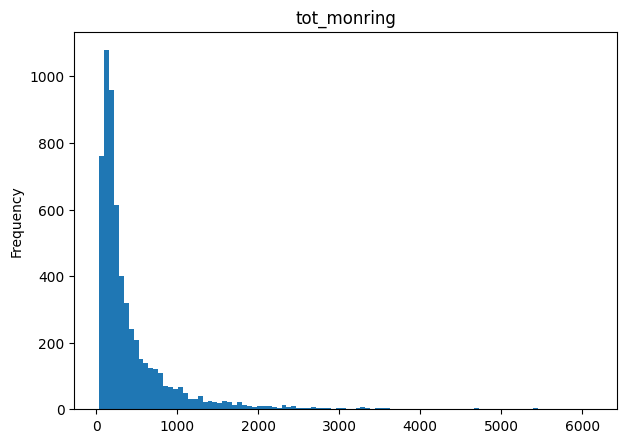

In [1383]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
#plt.xlim(0,5000)
#plt.ylim(0,1000)
# Plot Histogram on x
plt.hist(distances_m, bins=100)
plt.gca().set(title='tot_monring', ylabel='Frequency');

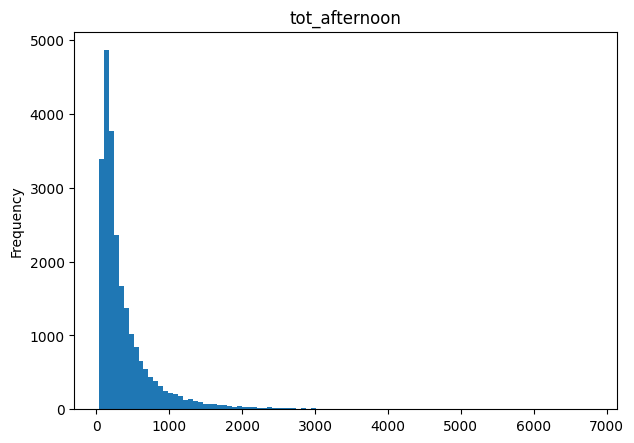

In [1384]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
#plt.xlim(0,5000)
#plt.ylim(0,1000)
# Plot Histogram on x
plt.hist(distances_a, bins=100)

plt.gca().set(title='tot_afternoon', ylabel='Frequency');

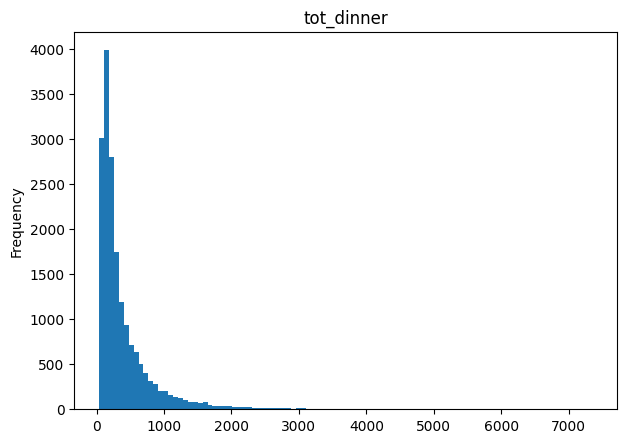

In [1385]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
#plt.xlim(0,5000)
#plt.ylim(0,1000)
# Plot Histogram on x
plt.hist(distances_d, bins=100)
plt.gca().set(title='tot_dinner', ylabel='Frequency');

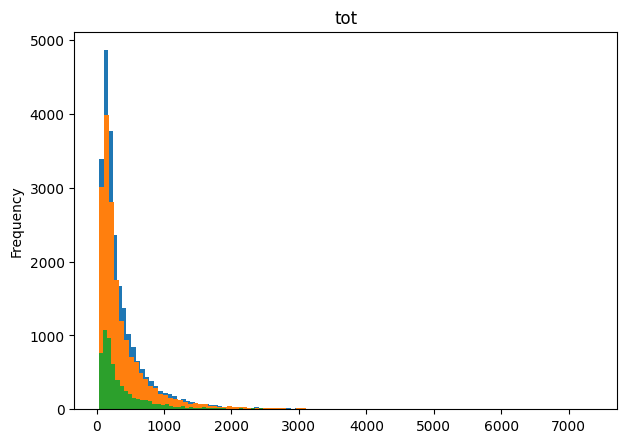

In [1386]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
#plt.xlim(0,5000)
#plt.ylim(0,1000)
# Plot Histogram on x
plt.hist(distances_a, bins=100)
plt.hist(distances_d, bins=100)
plt.hist(distances_m, bins=100)

plt.gca().set(title='tot', ylabel='Frequency');

# DBSCAN

In [1387]:
City_Name = 'Singapore'

In [1388]:
kms_per_radian = 6371.0088
epsilon = 0.01/kms_per_radian
min_sample = 1
print("radian of earth is ", kms_per_radian, " eps is ", epsilon, " min_samples are ", min_sample )

radian of earth is  6371.0088  eps is  1.5696101377226163e-06  min_samples are  1


In [1389]:
coords = df.to_numpy()
#db = joblib.load('./testDB.joblib')
db = DBSCAN(eps = epsilon , min_samples = min_sample , algorithm='ball_tree', metric='haversine').fit(np.radians(coords))

In [1390]:
start_time = time.time()
cluster_labels = db.labels_


# get the number of clusters
num_clusters = len(set(cluster_labels))

# all done, print the outcome
message = 'Clustered {:,} points down to {:,} clusters, for {:.1f}% compression in {:,.2f} seconds'
print(message.format(len(df), num_clusters, 100*(1 - float(num_clusters) / len(df)), time.time()-start_time))
clusters = pd.Series([coords[cluster_labels==n] for n in range(num_clusters)])


Clustered 48,206 points down to 33,240 clusters, for 31.0% compression in 0.01 seconds


In [1391]:
def get_centermost_point(cluster):
    centroid = (MultiPoint(cluster).centroid.x, MultiPoint(cluster).centroid.y)
    centermost_point = min(cluster, key=lambda point: great_circle(point, centroid).m)
    return tuple(centermost_point)


In [1392]:
centermost_points = []
for cluster in clusters.iteritems():
    if len(cluster[1]) >= min_sample:
        centermost_points.append(get_centermost_point(cluster[1]))


In [1393]:
lats, lons = zip(*centermost_points)
rep_points = pd.DataFrame({'lon':lons, 'lat':lats})


In [1394]:
rs = rep_points.apply(lambda row: df[(df['lat']==row['lat']) & (df['lon']==row['lon'])].iloc[0], axis=1)
rs.head(5)

,lat,lon
0,1.343074,103.757481
1,1.361739,103.764369
2,1.395681,103.744914
3,1.398643,103.744021
4,1.321962,103.861243


In [1395]:
df_cluster = pd.DataFrame(clusters, columns=['position'])
print(df_cluster.shape)
df_cluster


(33240, 1)


,position
0,"[[1.343074, 103.757481]]"
1,"[[1.361739, 103.764369]]"
2,"[[1.395681, 103.744914]]"
3,"[[1.398643, 103.744021], [1.398643, 103.744021]]"
4,"[[1.321939, 103.861289], [1.322038, 103.861236..."
...,...
33235,"[[1.337385, 103.705574]]"
33236,"[[1.337353, 103.739205]]"
33237,"[[1.337751, 103.731961]]"
33238,"[[1.314787, 103.895316]]"


In [1396]:
temp = df_cluster.iloc[1]
temp[0].shape

(1, 2)

# Shanghai

In [1397]:
# 위도
latitude =  1.283331
# 경도
longitude = 103.85

In [1398]:
number_of_colors = num_clusters

colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]


In [1399]:
m = folium.Map(location=[latitude, longitude],
               zoom_start=10, 
               width=1300, 
               height=1000
              )
#m

In [1400]:
for j in range(0,num_clusters):
    temp = df_cluster.iloc[j]
    k = temp[0].shape
    for i in range(0,k[0]):
        k=df_cluster.iloc[j]
        t=k[0]
        s=t[i]
        folium.CircleMarker([s[0], s[1]],
            radius=3,
            weight=10,
            color = colors[j]
            ).add_to(m)
    
#m

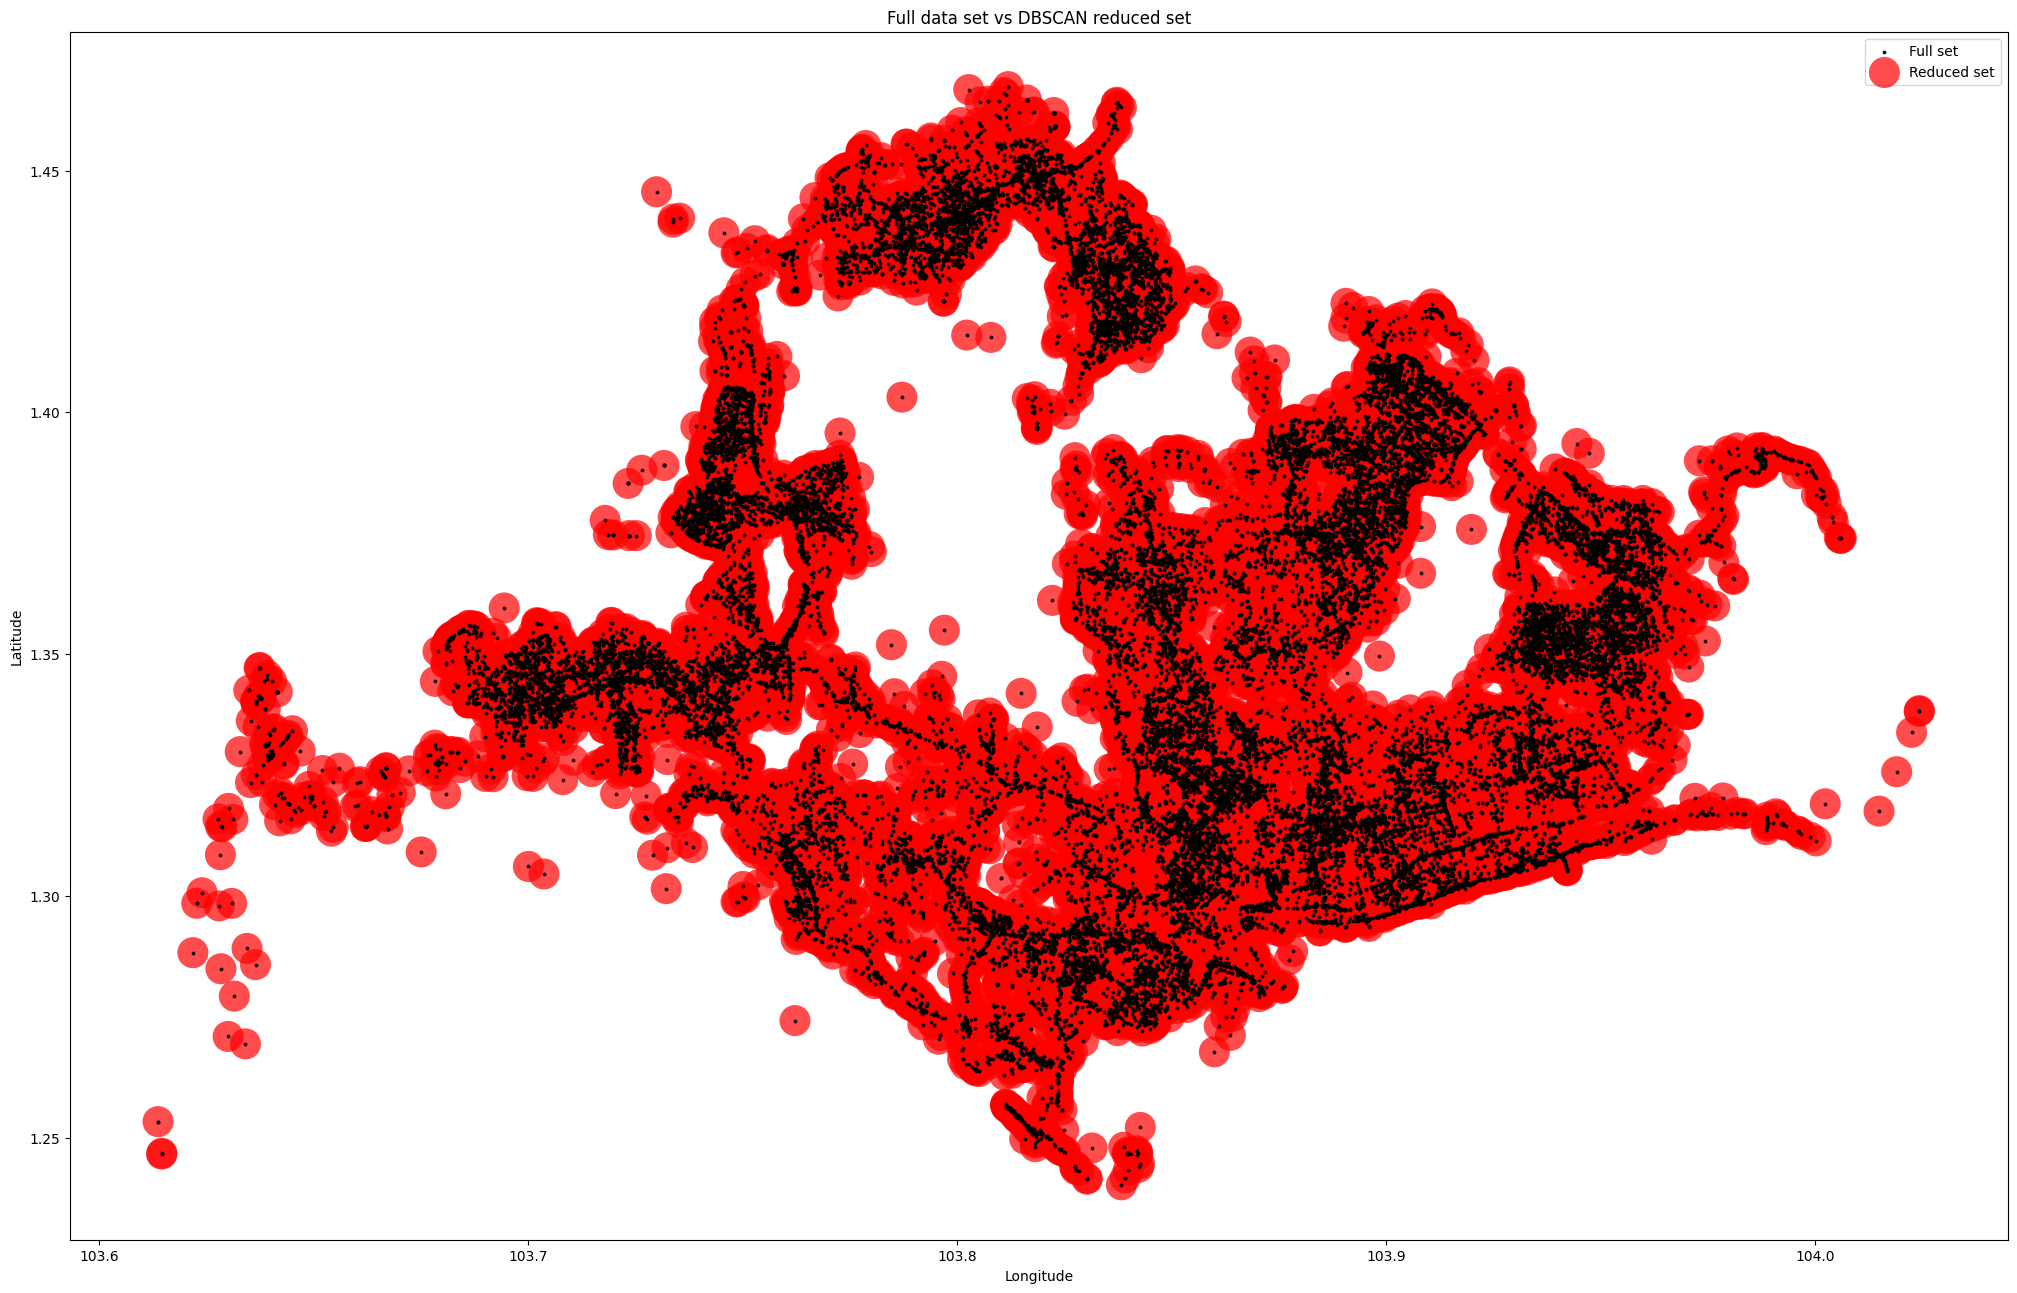

In [1401]:
fig, ax = plt.subplots(figsize=[25, 16])
rs_scatter = ax.scatter(rs['lon'], rs['lat'], c='red', edgecolor='None', alpha=0.7, s=500)
df_scatter = ax.scatter(df['lon'], df['lat'], c='k', alpha=0.9, s=3)
ax.set_title('Full data set vs DBSCAN reduced set')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend([df_scatter, rs_scatter], ['Full set', 'Reduced set'], loc='upper right')
plt.show()

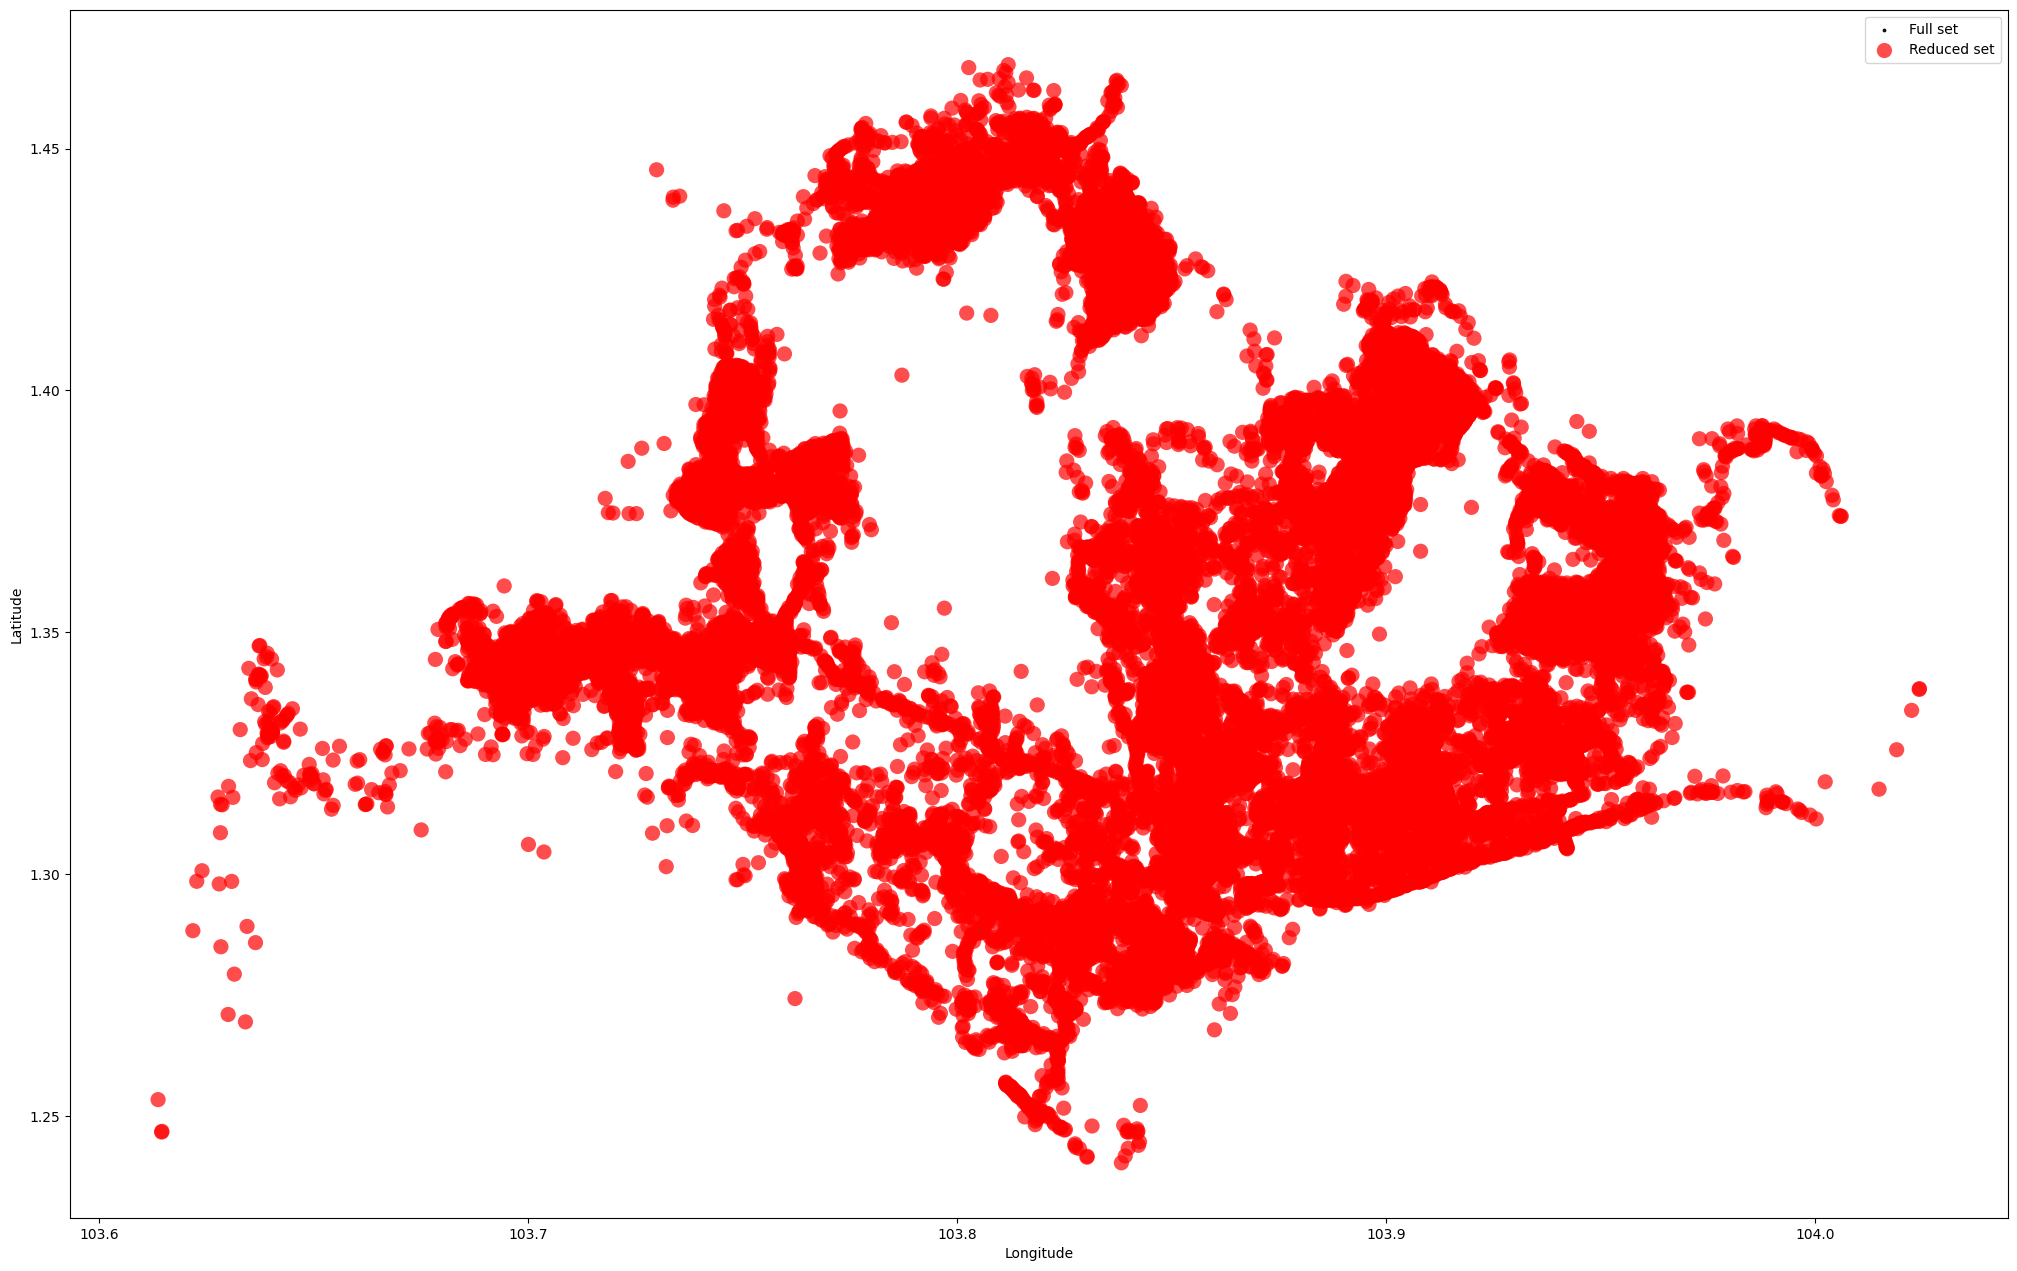

In [1402]:
fig, ax = plt.subplots(figsize=[25,16])
rs_scatter = ax.scatter(rs['lon'],rs['lat'], c = 'red', edgecolor = 'None', alpha = 0.7,s=120)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend([df_scatter, rs_scatter], ['Full set', 'Reduced set'], loc='upper right')
plt.show()

In [1403]:
#m.save('./Maps/'+str(City_Name)+'/DBSCAN_Heat_V2_DC_'+str(epsilon * kms_per_radian)+'.html')


In [1404]:
from joblib import dump, load

#dump(db, 'testDB.joblib')


## To_Do List 
### plot dendrogram

check its volume & hierarchy

> 28 March. failed


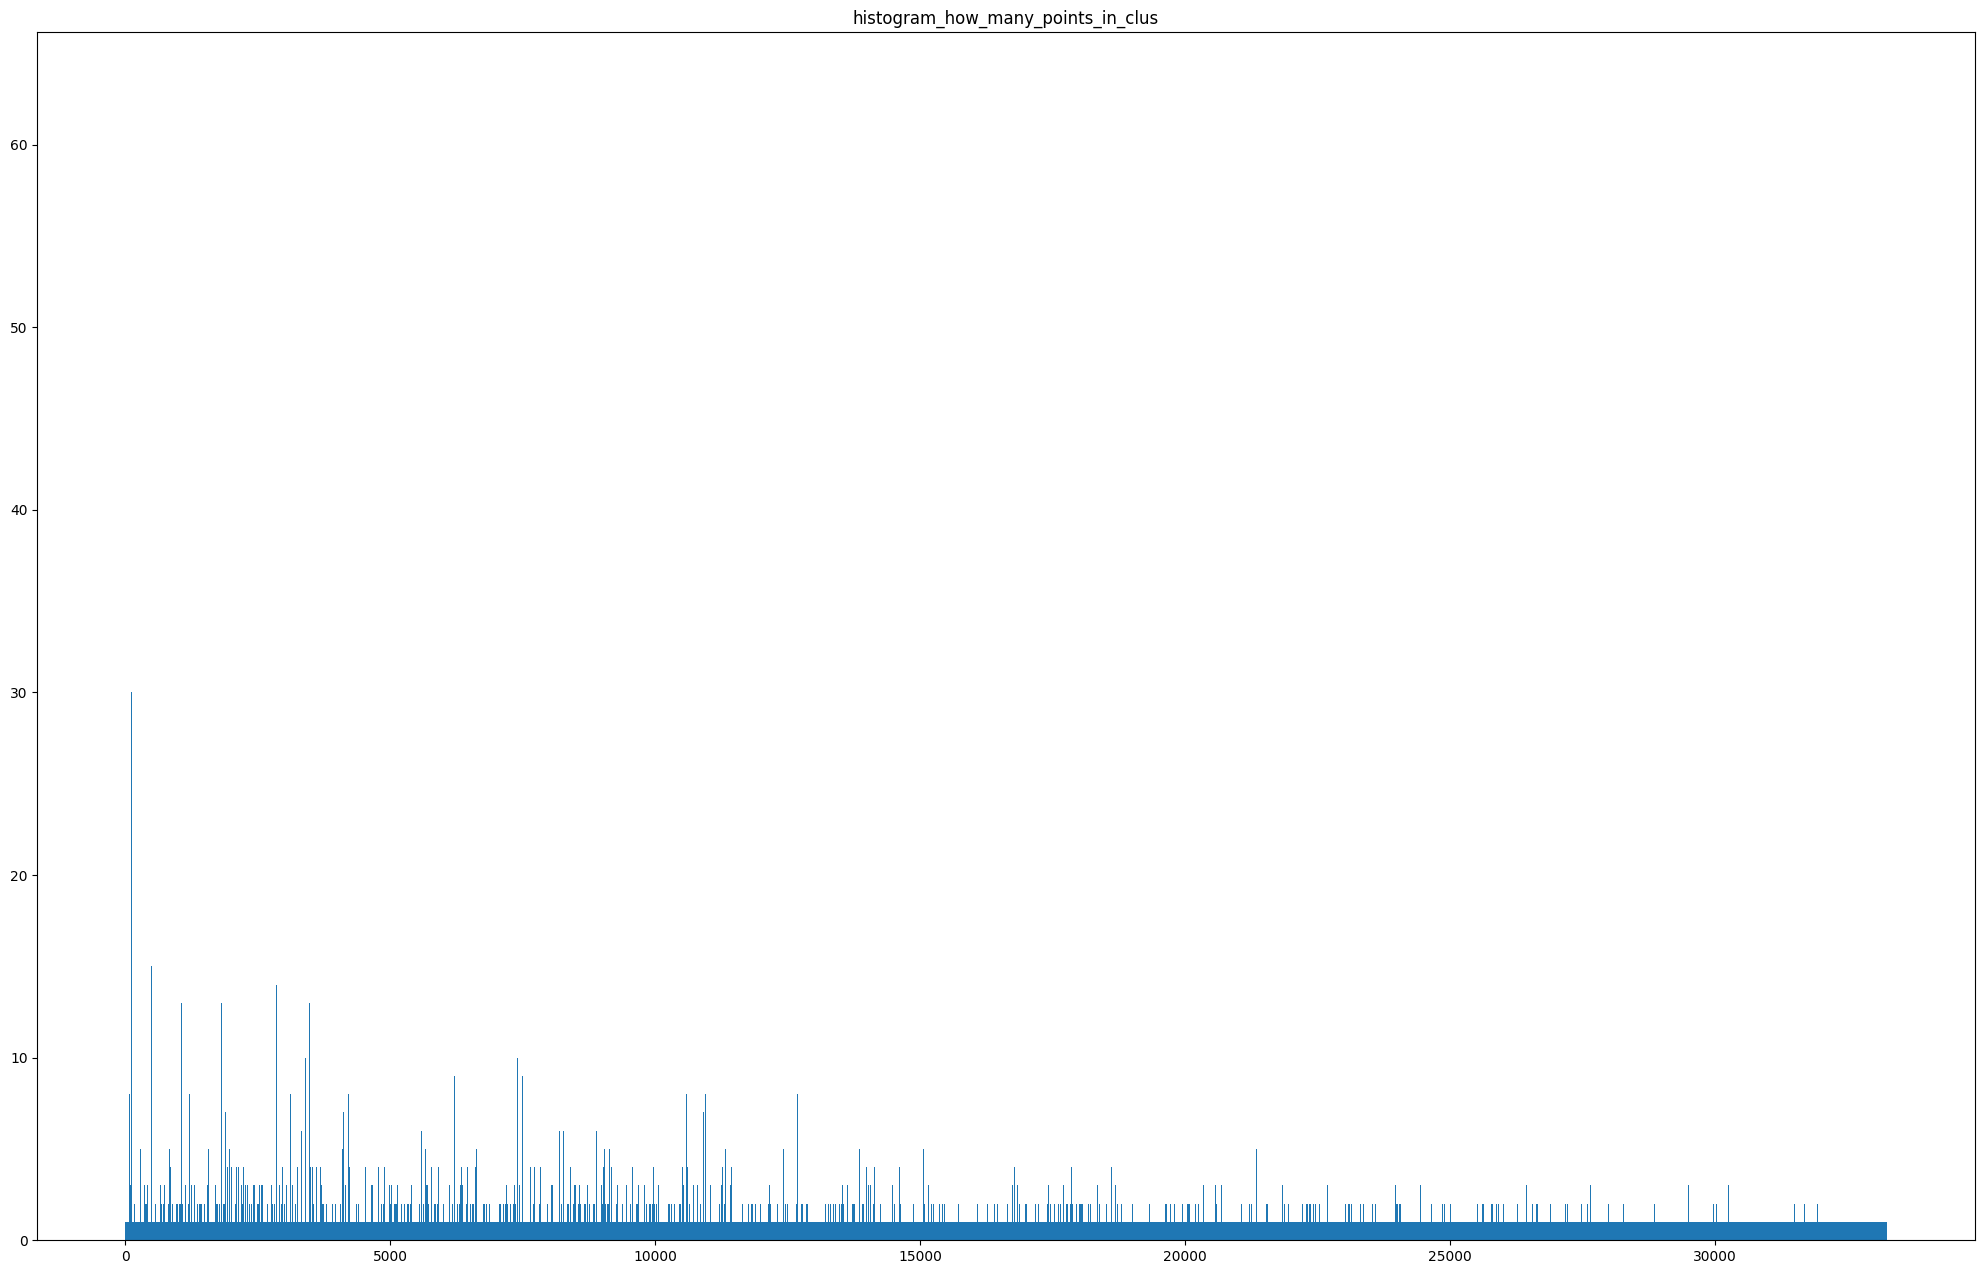

In [1405]:
plt.figure(figsize=(25,16))
plt.hist(cluster_labels, bins = np.linspace(0,num_clusters,num_clusters)) 
plt.title("histogram_how_many_points_in_clus") 
plt.savefig('./Maps/'+City_Name+'/hist_of_clus_of_'+City_Name+'_Dinner_'+str(epsilon* kms_per_radian)+'.png')
plt.show()

In [1406]:
num_clusters

33240

In [1407]:
solution = 0

In [1408]:
for j in range(0, num_clusters):
    solution += list(cluster_labels).count(j)
solution

48206

In [1409]:
avg_clus = solution/num_clusters
print(avg_clus)

1.4502406738868834


# Build a Network

> with Networkx


In [1410]:
import networkx as nx

In [1411]:
solution=[]
print (solution)

[]


In [1412]:
numclus = df.shape[0]
checkmaker = -1
for i in range(0, numclus):
    minv = 3
    for j in range(0,len(centermost_points)):
        t = centermost_points[j]
        m = df.iloc[i]
        target = haversine(t[0],t[1],m[0],m[1])
        if(target == 0):

            checkmaker = j
            break
        if(target<minv and target >0):
            checkmaker = j
            minv = target
            if(minv<0.5 ):
                checkmaker =j
                break
        if( j == num_clusters and minv>0.05 ):
            checkmaker=-1
            break
    if cluster_labels[checkmaker]==-1 or cluster_labels[i] ==-1 or checkmaker == -1:
        print("OPPPPS =  ", i)
        continue
    else:
        if i % 1000 == 0:
            print(i/1000)
        #print("we've got ", i, " these here, bro ", checkmaker, " and i'm " , (cluster_labels[i],cluster_labels[checkmaker]))
        solution.append([cluster_labels[i],cluster_labels[checkmaker]])

0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.0
29.0
30.0
31.0
32.0
33.0
34.0
35.0
36.0
37.0
38.0
39.0
40.0
41.0
42.0
43.0
44.0
45.0
46.0
47.0
48.0


## Build Network

1. I think it is successfully  got the proper link and edge

> Power-law fitting

1. Clauset. need to convey


In [1413]:
G=nx.Graph()


In [1414]:
for i in range(0,len(centermost_points)):
    k = centermost_points[i]
    G.add_node(str(i), lat= k[0],long =k[1])

In [1415]:
for i in range(0,len(solution)):
    k = solution[i]
    G.add_edge(str(k[0]),str(k[1]))

In [1416]:
#nx.draw(G, with_labels=True)

In [1417]:
#nx.write_gexf(G, "G_Week.gexf")


# Heat map

In [1418]:
cnt_in = np.zeros(len(centermost_points))
cnt_out = np.zeros(len(centermost_points))
for i in range(0,len(solution)):
    k = solution[i]
    cnt_out[int(k[0])] += 1
    cnt_in[int(k[1])] += 1

    

In [1419]:
cnt_in

array([ 450.,  492., 1062., ...,    0.,    0.,    0.])

In [1420]:
cnt_out

array([1., 1., 1., ..., 1., 1., 1.])

[]

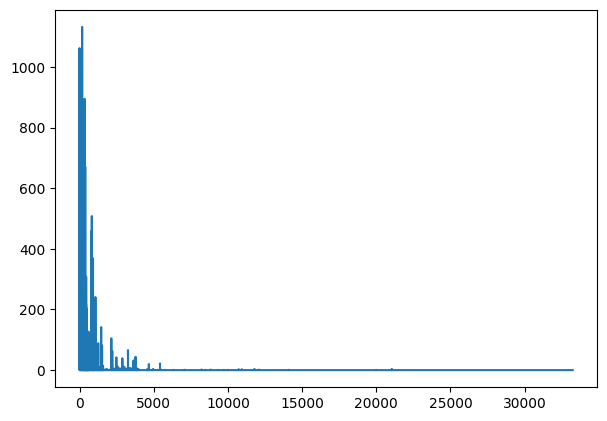

In [1421]:
plt.plot( cnt_in)

plt.savefig('./Maps/'+City_Name+'/hist_of_cnt_in_'+City_Name+'_Dinner_'+str(epsilon* kms_per_radian)+'.png')

plt.plot()

[]

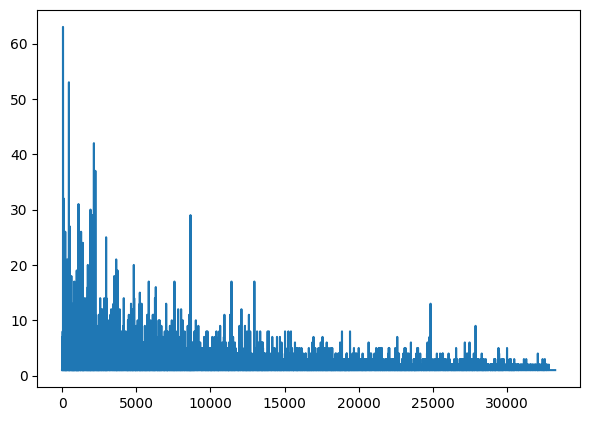

In [1422]:
plt.plot(cnt_out)
plt.savefig('./Maps/'+City_Name+'/hist_of_cnt_out_'+City_Name+'_Dinner_'+str(epsilon* kms_per_radian)+'.png')
plt.plot()

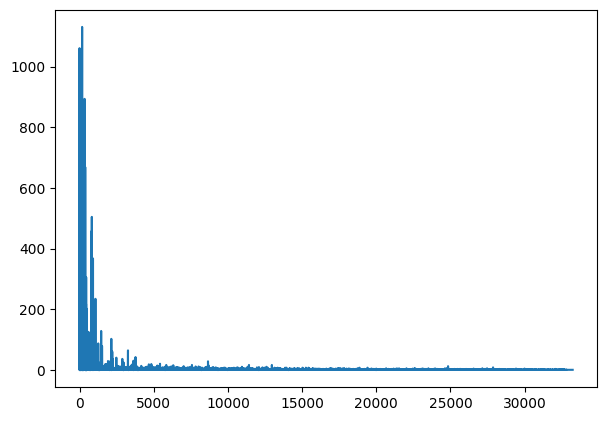

In [1423]:
plt.plot(abs(cnt_out-cnt_in))


In [1424]:
heat = abs(cnt_out-cnt_in)
print(heat.shape)


(33240,)


In [1425]:
for i in range(0,heat.shape[0]):
    if heat[i]==0:
        heat[i]=1

In [1426]:
heat.min()

1.0

In [1427]:
s = pd.Series(heat)

# power_law_fitting

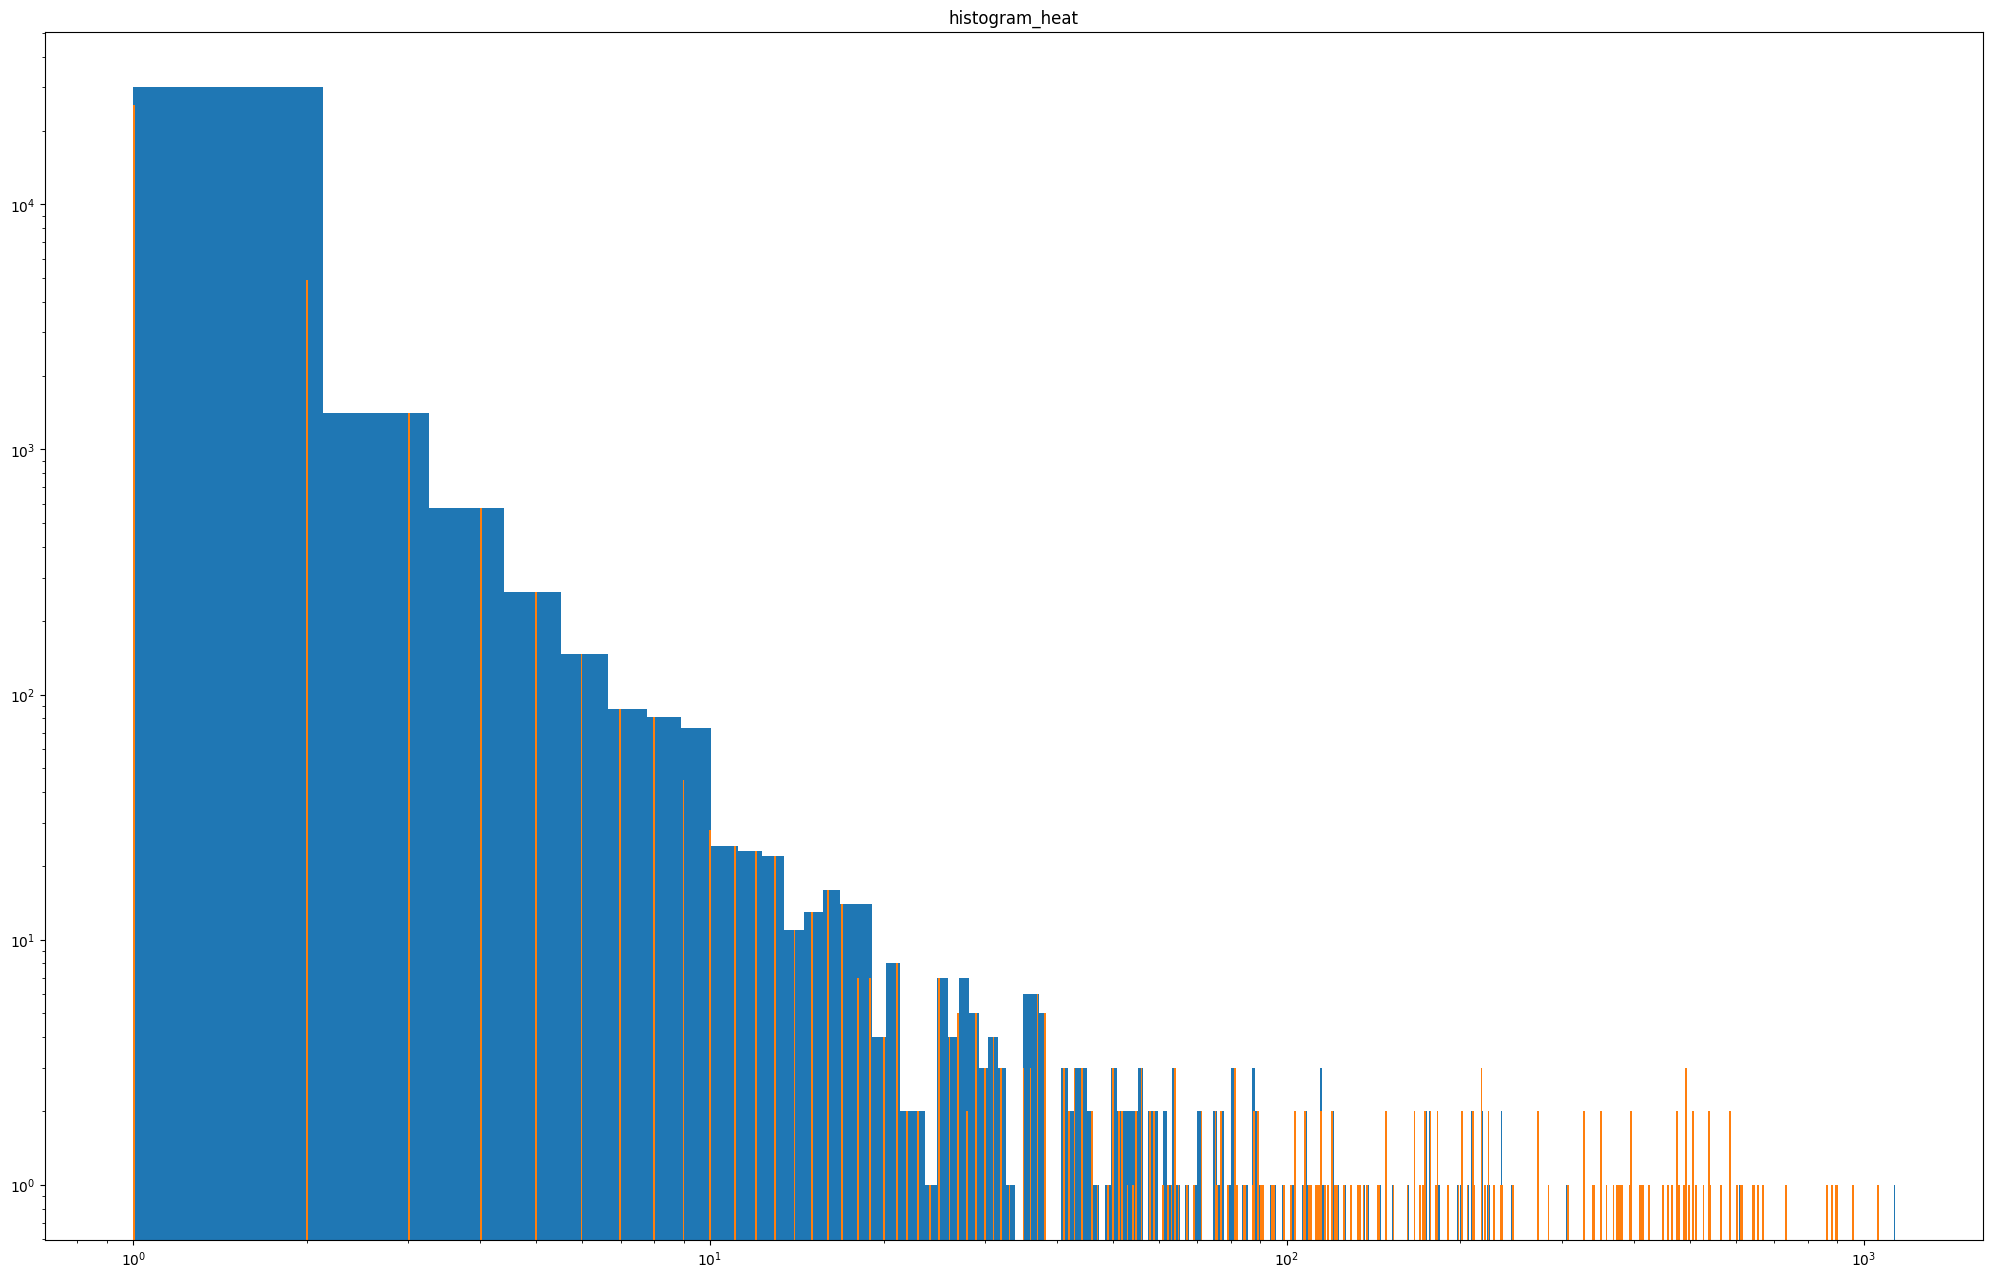

In [1428]:
plt.figure(figsize=(25,16))
hist, bins, _ = plt.hist(s, bins=1000)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(heat, bins = logbins)
plt.title("histogram_heat") 
plt.savefig('./Maps/'+City_Name+'/hist_of_heat_'+City_Name+'_Dinner_'+str(epsilon* kms_per_radian)+'.png')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [1429]:
heat

array([4.490e+02, 4.910e+02, 1.061e+03, ..., 1.000e+00, 1.000e+00,
       1.000e+00])

Calculating best minimal value for power law fit
alpha=  3.673806835061098   sigma=  0.030050361903001806


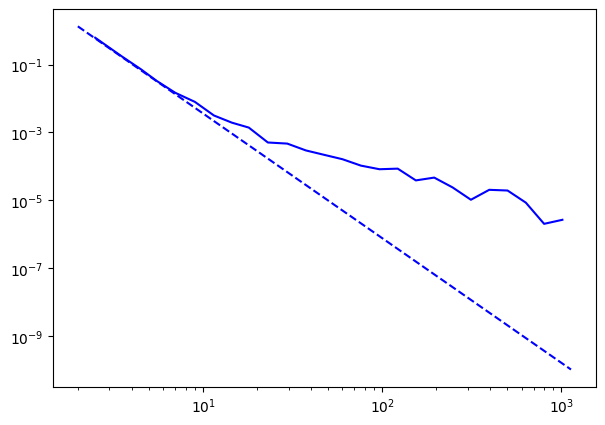

In [1430]:
import powerlaw
fit = powerlaw.Fit(heat)
fit.power_law.plot_pdf( color= 'b',linestyle='--',label='fit ccdf')
fit.plot_pdf( color= 'b')

print('alpha= ',fit.power_law.alpha,'  sigma= ',fit.power_law.sigma)

In [1431]:
fit.xmin

2.0

In [1432]:
heat.mean()

2.8365824308062577

In [1433]:
heat.std()

24.61145986225254

In [1434]:
np.max(heat)

1131.0

In [1435]:
m2 = folium.Map(location=[latitude, longitude],
               zoom_start=10, 
               width=1300, 
               height=1000
              )

In [1436]:
resolution = (256/int(np.max(heat)))
print(resolution)

0.22634836427939875


In [1437]:
for j in range(0,num_clusters):
    temp = df_cluster.iloc[j]
    k = temp[0].shape
    for i in range(0,k[0]):
        y=df_cluster.iloc[j]
        t=y[0]
        s=t[i]
        colors2 = 'ff' + format(int(256-resolution*heat[j]),'x') + format(int(256-resolution*heat[j]),'x')
        if heat[j]==np.max(heat):
            colors2 = 'ff0000'
        if heat[j]<25:
            continue
        folium.CircleMarker([s[0], s[1]],
            radius=5,
            weight=15,
            color = '#'+colors2,
        
            ).add_to(m2)
    
m2

In [1438]:
m2.save('./Maps/'+City_Name+'/DBSCAN_Heat_'+str(City_Name)+'_Dinner_'+str(epsilon* kms_per_radian)+'.html')


# For_Records

> 0.1
>> 15.99698568198945 163.24597597536595 5342.0 2654 18.163526752072343 9 17


> 0.09
>>14.59 140.33443715974056 4801.0 3400 14.178235294117647 9 17

> 0.08
>> 14.11131221719457 102.09365901661208 3107.0 4420 10.90633484162896 9 17

> 0.07
>>11.990935034413296 71.28808823597211 2254.0 5957 9 17

> 0.06
>>9.726334121159349 62.29935868595677 2142.0 8039 9 17


>0.01
>> 2.835379061371841 24.619431385627475 1162.0 33240 9 17



In [1439]:
print(heat.mean(),heat.std(),np.max(heat),num_clusters,query_month ,query_day )

2.8365824308062577 24.61145986225254 1131.0 33240 9 17


# Grid

# Calinski-Harabasz index(CH)


In [1440]:
station_raw

,bike_id,time_stamp_ori,time_stamp_dst,lng0,lat0,lng1,lat1
0,10712,2017-09-14 14:16:33,1505366520,103.641586,1.335649,103.643479,1.333943
1,21517,2017-09-11 08:07:26,1505085748,103.745061,1.347460,103.745769,1.346230
2,21517,2017-09-12 23:39:18,1505227289,103.746032,1.347189,103.745603,1.345680
3,21517,2017-09-13 06:49:58,1505253328,103.745603,1.345680,103.748290,1.348048
4,21517,2017-09-14 08:07:56,1505344240,103.748720,1.348492,103.746627,1.346105
...,...,...,...,...,...,...,...
301735,3113,2017-09-14 20:26:37,1505388569,103.885917,1.360959,103.884426,1.360316
301736,3113,2017-09-14 20:31:58,1505388847,103.884426,1.360316,103.885917,1.360959
301737,3113,2017-09-14 22:34:08,1505396686,103.885148,1.360353,103.890934,1.361318
301738,3113,2017-09-15 23:32:20,1505486297,103.891475,1.362705,103.891155,1.361030


In [1441]:
x,y = 0,0
for i in range(len(centermost_points)):
    x = x + centermost_points[i][0]
    y = y + centermost_points[i][1]
center_data=[x/len(centermost_points),y/len(centermost_points)]

In [1442]:
m3 = folium.Map(location=[x/len(centermost_points),y/len(centermost_points)],
               zoom_start=10, 
               width=1300, 
               height=1000
              )
folium.CircleMarker(location=[x/len(centermost_points),y/len(centermost_points)],
    radius=5,
    weight=15,
    color = '#'+'333333'
        
    ).add_to(m3)
    
m3

In [1443]:
df_cluster

,position
0,"[[1.343074, 103.757481]]"
1,"[[1.361739, 103.764369]]"
2,"[[1.395681, 103.744914]]"
3,"[[1.398643, 103.744021], [1.398643, 103.744021]]"
4,"[[1.321939, 103.861289], [1.322038, 103.861236..."
...,...
33235,"[[1.337385, 103.705574]]"
33236,"[[1.337353, 103.739205]]"
33237,"[[1.337751, 103.731961]]"
33238,"[[1.314787, 103.895316]]"


In [1444]:
numc=len(centermost_points)

In [1445]:
ci=0
for i in range(len(centermost_points)):
    n = df_cluster.iloc[i][0].shape[0]
    c = haversine(center_data[0],center_data[1],centermost_points[i][0],centermost_points[i][1])
    ci = n*c**2 + ci
print(ci)

3267719.011784974


In [1446]:
n=df.iloc[1]
n[0]

1.361739

In [1447]:
di=0
for i in range(maxlen):
    n=df.iloc[i]
    c=haversine(center_data[0],center_data[1],n[0],n[1])
    di=di+c
print(di)

338829.8288334157


In [1448]:
df_cluster

,position
0,"[[1.343074, 103.757481]]"
1,"[[1.361739, 103.764369]]"
2,"[[1.395681, 103.744914]]"
3,"[[1.398643, 103.744021], [1.398643, 103.744021]]"
4,"[[1.321939, 103.861289], [1.322038, 103.861236..."
...,...
33235,"[[1.337385, 103.705574]]"
33236,"[[1.337353, 103.739205]]"
33237,"[[1.337751, 103.731961]]"
33238,"[[1.314787, 103.895316]]"


In [1449]:
def CH(df,centermost_points,center_data,maxlen,ci,NC):
    sum=0
    for i in range(numc):
        k,dk = 0,0
        n = df_cluster.iloc[i][0].shape[0] #n_i
        t = df_cluster.iloc[i][0] # points
        
        for j in range(0,n):
            k =  haversine(t[j][0],t[j][1],centermost_points[i][0],centermost_points[i][1]) 
            if k==0:
                k=0.00001
            dk =  dk + k
#        print("dk",dk,"sum",sum)
        sum = sum + (dk)**2
    return (ci/(NC-1))/((maxlen-NC)/sum)
  

In [1450]:
maxlen

48206

In [1451]:
CH(df_cluster,centermost_points,center_data,maxlen,ci,num_clusters)

0.011424290376573597

In [ ]:
target =0
targets = (0,0)
for i in range(numc):
    for j in range(numc):
        t=haversine(centermost_points[i][0],centermost_points[i][1],centermost_points[j][0],centermost_points[j][1])
        if target <t:
            target=t
            targets =(i,j)
                
print(target,targets)

In [ ]:
def IndexI(df,centermost_points,maxlen,di,target,NC):
    sum=0
    for i in range(numc):
        k,dk = 0,0
        n = df_cluster.iloc[i][0].shape[0] #n_i
        t = df_cluster.iloc[i][0] # points
        
        for j in range(0,n):
            k =  haversine(t[j][0],t[j][1],centermost_points[i][0],centermost_points[i][1]) 
            if k==0:
                k=0.00001
            dk =  dk + k
            #print("dk",dk,"i",i)
        sum = sum + dk
     #   print(i,"  sum ",sum)
    
    return ((1/NC)*(di/sum)*target)**2



In [ ]:
target

In [ ]:
IndexI(df_cluster , centermost_points , maxlen , di , target , numc)

In [1456]:
target2 =10000000
targets = (0,0)
for i in range(numc):
    for j in range(numc):
        t=haversine(centermost_points[i][0],centermost_points[i][1],centermost_points[j][0],centermost_points[j][1])
        if target2 > t and i!=j:
            target2=t
            targets =(i,j)
                
print(target2,targets)

45.71599993852819 (10516, 10761)


In [1457]:
target2

0.0024073980001282596

In [1458]:
def XB(df_cluster , centermost_points , maxlen  , target , numc):
    sum=0
    for i in range(numc):
        k,dk = 0,0
        n = df_cluster.iloc[i][0].shape[0] #n_i
        t = df_cluster.iloc[i][0] # points
        
        for j in range(0,n):
            k =  haversine(t[j][0],t[j][1],centermost_points[i][0],centermost_points[i][1]) 
            if k==0:
                k=0.00001
            dk =  dk + k
#        print("dk",dk,"sum",sum)
        sum = sum + (dk)**2
    return sum/(maxlen*target**2)

In [1459]:
XB(df_cluster , centermost_points , maxlen  , target2 , numc)

6.225028319308866